# **16S rRNA Gene Analysis of The Isolated Bacteria DNA from Soil Sample in Ranca Upas, West Java, Indonesia using BioPython and BLAST**

## **Context**

### **Background**

Microbial isolation and identification are critical processes in microbiology that help scientists understand microbial diversity from environment. Soil serves as a complex ecosystem, teeming with microbial life that is crucial for ecological balance. These microorganisms, including bacteria, play vital roles in nutrient cycling, organic matter decomposition, and maintaining soil health. Identifying and understanding these bacterial communities may provide insights into their ecological functions and potential applications in agriculture and biotechnology.

The 16S rRNA gene encodes the RNA component of the small subunit of the ribosome, playing a crucial role in protein synthesis. This gene is ideal for bacterial identification because it contains both highly conserved and variable regions. The conserved regions enable the design of universal primers that can amplify the 16S gene from a wide range of bacteria, while the variable regions provide species-specific sequences that aid in distinguishing between different bacterial species.

Ranca Upas, located in Ciwidey, West Java is an ecologically significant area known for its rich biodiversity in Indoensia. The soil in this region is influenced by unique environmental factors such as climate, vegetation, and human activity. Studying the bacterial DNA isolated from Ranca Upas soil can reveal its microbial composition and ecological characteristics.

This study employs BioPython, a powerful library for computational biology, to process and analyze sequences. The BLAST (Basic Local Alignment Search Tool) algorithm is used to compare the sequences against established databases, enabling identification of the bacteria.

### **Objective of The Analysis**

The main objective of the this analysis is to identify the isolated bacterial collected from soil sample in Ranca Upas, West Java through bioinformatic tools utilizing Biopython and BLAST.


## **Methods**

### **Sample Collection and Bacterial DNA Isolation**
  
#### **Sampling Location**
Sampling location was located in Ranca Upas (Latitude: -7.1664, Longitude: 107.3583), Ciwidey, West Java, Indonesia. The area is a high-altitude area (approximately 1700 m above sea level) with diverse ecosystems, offering cool climate and surrounded by tropical forest. This area potentially harboring novel bacterial species adapted to cooler temperatures and unique soil chemistry. 

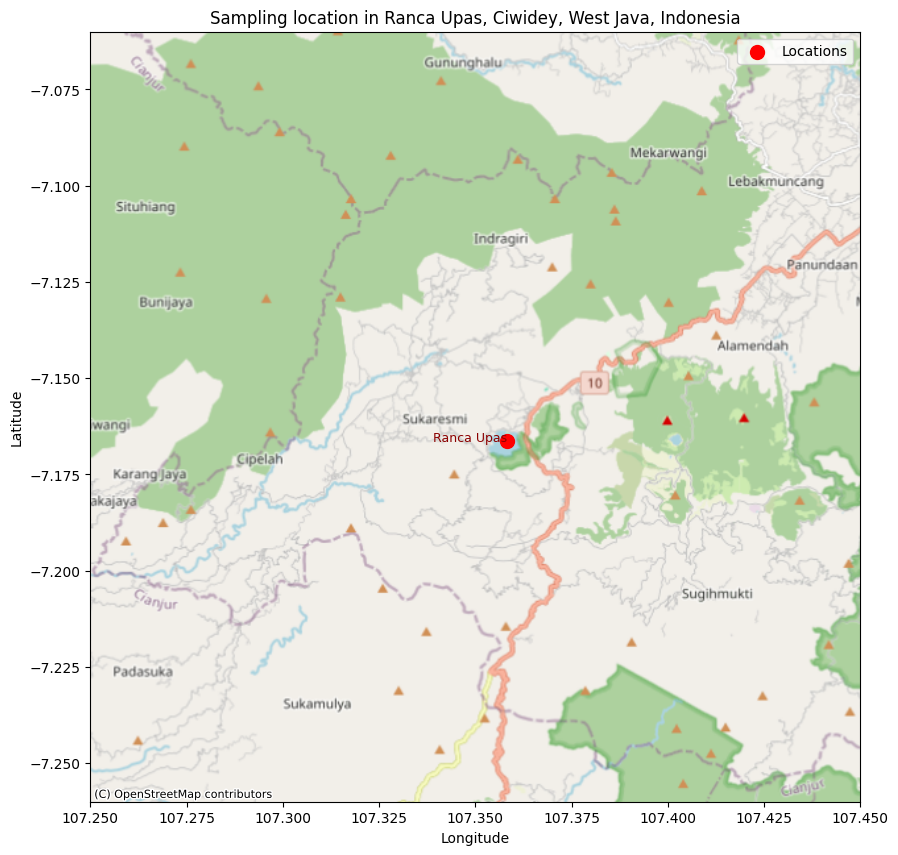

In [23]:
# Importing library for visualizing geo data
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Define the coordinates for Ranca Upas location
locations = {
    'Location': [
        'Ranca Upas'
    ],
    'Latitude': [
        -7.1664  # Latitude for Ranca Upas
    ],
    'Longitude': [
        107.3583  # Longitude for Ranca Upas
    ]
}

# Convert the coordinates into a GeoDataFrame
geometry = [Point(xy) for xy in zip(locations['Longitude'], locations['Latitude'])]
gdf = gpd.GeoDataFrame(locations, geometry=geometry)
gdf.crs = "EPSG:4326"  # Set coordinate system to WGS84

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the locations
gdf.plot(ax=ax, color='red', markersize=100, label="Locations")

# Annotate each location
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Location']):
    ax.text(x, y, label, fontsize=9, ha='right', color='darkred')

# Approximate 100 km zoom out: Adjust limits by ~1 degree in latitude and longitude
plt.xlim(107.25, 107.45)  # Longitude range for zoom out
plt.ylim(-7.26, -7.06)  # Latitude range for zoom out

# Add basemap for context
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Titles and labels
plt.title("Sampling location in Ranca Upas, Ciwidey, West Java, Indonesia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

plt.show()


#### **Sample Collection and Bacterial Colony Isolation**
The soil sample was collected (Soil sample in Ranca Upas, West Java, Indonesia) using sterile tools to avoid contamination, ensuring an accurate representation of the microbial community. Once collected, the sample was stored on cooler box until it could be processed in the lab. In the lab, the soil sample was mixed with a sterile liquid, phosphate-buffered saline (PBS), and vigorously shaken to release bacteria from soil particles. Serial dilution was performed on the solution to reduce microbial concentrations. Then, diluted solution was spread on agar plates and incubated at the suitable temperature until colonies were seen on agar. Individual bacterial colonies were isolated on nutrient agar plates and further incubated to promote growth. After incubation, distinct colonies with unique morphologies were selected for DNA extraction. In this study, only one colony was selected for further investigation.

#### **DNA Extraction, Amplification, and Verification**
DNA was extracted from the isolated bacterial colonies using a standard extraction kit, following the manufacturer’s instructions. The extracted DNA was then amplified by targeting the 16S rRNA gene, a well-conserved region suitable for bacterial identification, using universal primers. The amplification was performed with polymerase chain reaction (PCR) under optimized conditions, ensuring the production of high-quality DNA fragments specific to each bacterial species. Verification of successful amplification was confirmed through agarose gel electrophoresis, where the expected 1,500 base-pair (bp) bands were visualized under UV light.

#### **Purification and DNA Sequencing**
Following amplification, the PCR products were purified to remove excess primers and contaminants that might interfere with sequencing. The purified DNA was sent to Macrogen, Korea, for sequencing, where the Sanger method was applied to obtain high-quality reads of the 16S rRNA gene sequence for each isolate. This method allows precise determination of the nucleotide sequence, which is essential for accurate bacterial identification.


### **Sequence Analysis using BioPython and BLAST**

#### **Sequence Prepocessing**

During the study, there were two kind of sequences file received from Macrogen that consist of:
1. forward sequence
2. Reverse sequence

The analysis began with processing the sequences received by importing them into Python using Biopython’s SeqIO module, which handles various sequence formats. After that, multiple reads were aligned and combined to generate a consensus sequence. Once the consensus sequence was obtained, it was prepared for further comparison. 


**Importing library and directory preparation**

In [5]:
# Import library
from Bio import Align
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner

In [6]:
# Checking the directory
import os
print(os.listdir('C:/Users/Lenovo/Documents/1. Bioinformatics/Biopython'))

['.ipynb_checkpoints', 'amino_acids_codontable .csv', 'Bacterial Sequence Analysis.ipynb', 'Bakteri bioedit consensus result.txt', 'Bakteri Bioedit result.txt', 'Bakteri Forward.txt', 'Bakteri Reverse.txt', 'Creating-Custom Functions for Bioinformatics.ipynb', 'Latihan bioedit konsesus kulap', 'ls_orchid.fasta.txt', 'RancaUpas_Bacterial Sequence Analysis.ipynb', 'read_fasta.ipynb', 'SRR003265.filt.fastq.gz']


In [7]:
# Specify the file paths
forward_file = 'C:/Users/Lenovo/Documents/1. Bioinformatics/Biopython/Bakteri Forward.txt'
reverse_file = 'C:/Users/Lenovo/Documents/1. Bioinformatics/Biopython/Bakteri Reverse.txt'


**Reading the sequence files**

In [8]:
# Read sequences from the sequencing files

# Forward sequence
with open(forward_file, 'r', encoding='utf-8') as f:
    forward_seq = Seq(f.read())  # Read and remove any extra spaces/newlines
# Reverse sequence
with open(reverse_file, 'r', encoding='utf-8') as f:
    reverse_seq = Seq(f.read())

In [9]:
# Display the forward sequence
forward_seq

Seq('ATATGGAATGGCGCGTGCTATACATGCAGTCGAGCGAATGGATTGAGAGCTTGC...TTC')

In [10]:
# Display the reverse sequence
reverse_seq

Seq('TTTTTTTTTTATTTGATTTTCGTCAGACGAACGCTGGCGGCATGCCTAATACAT...CCT')

#### **Sequence alignment and creating consensus** 

In [11]:
# Create reverse complement from the reverse sequence
reverse_comp_seq = reverse_seq.reverse_complement()

reverse_comp_seq

Seq('AGGCCTTTTGATAGCTCTTCACTGGTTCTGAGAGAATGATTTGTCTTCTTTGTT...AAA')

In [12]:
# Align the sequences
aligner = PairwiseAligner()
alignments = aligner.align(forward_seq, reverse_comp_seq)

# Retrieve the best alignment
aligned_seq1, aligned_seq2 = alignments[0][0], alignments[0][1]

In [13]:
# Generate a consensus sequence
consensus = []
for base1, base2 in zip(aligned_seq1, aligned_seq2):
    if base1 == base2:
        consensus.append(base1)
    elif base1 == "-" or base2 == "-":
        consensus.append(base1 if base2 == "-" else base2)
    else:
        consensus.append("N")  # Handle mismatches

consensus_seq = ''.join(consensus)
print("Consensus sequence:")
print(consensus_seq)

Consensus sequence:
AGGCCTATTTGGAATAGGCGCGTGCTATACACTGCAGTTCTGAGCAGAATGGATTTGAGAGTCTTGCTCTCAATGTTGAAGTTCTTAGCGGCGGAAACGGGTCGAGTAACCACCAGACCATGGGCCTAATTCCCCTGCCTCATTCAAGTACTGCCGGTTCTTCATGCAGTGACTCCTCAGAGGGTAAAGCCGTGGGCTAATATCCAGGCAGACTTAATCATTTTGAACAACCTGCATGGATCCTTTCAAGCCAAATTGAAATACGGACAACGGCTTCGGCTGTTACACTTAAAGCCTGGATGGACCCTGCGTCGGCACGTTCACGGCTACGTTGGCTGATCTGGATAACGGCATCACTCAAGGCAACGATGCTGTAGCCGAGCTCTGTTTAGCAGGGTGATCGGGTTCTCTTACACTGGGACAGTTGAGCAACACGGAAAACCCATTGGGACTCACTACGGGAGGCATGCATGTGTAAGGGAATCTTCCGCAACTTTGGACGCTTCAAAGTACTGACCGGATGCTAACGTTTTCCGCGTGGAGTGATAAATGGGCTTTCGTGTCTCAGTCCCAAAAATCAGTTGTTGCCGGATCACCCTCTCAGGTCGAGCTATGGCATCATCGTCTTGAAGTAAGGCTCGTTACACCCACCAACTAAAGCTAATGCAAACCAGAACGAATTGGTCGATGTCGTATAAGTGACGAATTGCTAGAGCCGGATCATTTCAATCTTGCTTCCATGCGGAAGAATGATAAATTATGCGGTATTTAGCTACCCGTTTCACGAGATTGGTGTAAATCCCCCCGCTTATAGCGTAGATATCCTTTTTATCAGTGTTACTCACCCCTGGCAACTCCCTCGCGCGCTAACTGCTGTTCTACCCCGCCCCAAAGTGGGGGCAAAGCACTGTCCATCTGTTTCGCTCGACTTGCATGGTAATCTTAGGCATGCTTTCTGCATAACAATGCGTTCGTACTGA

In [21]:
len(consensus_seq)

1005

#### **BLAST Analysis with Biopython**

After establishing the consensus sequence, Biopython's BLAST interface was used to align it against the NCBI nucleotide database to identify the bacterial species. The sequence was submitted to BLAST, and the resulting alignment scores, e-values, and match percentages were retrieved for comparison. This provide insight into the closest known sequences in the database, helping to confirm the bacterial identity by matching our consensus sequence with similar bacterial sequences already cataloged in the NCBI database.



**Importing Library**

In [14]:
# Import library 
from Bio.Blast import NCBIWWW
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast import NCBIXML


In [15]:
# Create a SeqRecord object
sequence = Seq(consensus_seq)
seq_record = SeqRecord(sequence, id="consensus_sequence")

**BLAST Analysis against NCBI server**

In [19]:
# Run BLAST against NCBI server

# Initialize an empty list to store BLAST results
blast_results = []

# Run BLAST search using blast and 16S rRNA sequences database
result_handle = NCBIWWW.qblast("blastn", "nt", seq_record.seq)

# Parse and display results
from Bio.Blast import NCBIXML
blast_records = NCBIXML.parse(result_handle)

for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            # Calculate query coverage percentage
            query_cover = (hsp.align_length / len(seq_record.seq)) * 100
            # Append results as a dictionary to the blast_results list
            blast_results.append({
                "Description": alignment.title,
                "Max Score": hsp.score,
                "Total Score": alignment.length,  # assuming alignment length as total score proxy
                "Query Cover": f"{query_cover:.1f}%",
                "E-value": hsp.expect,
                "Per. Ident": f"{(hsp.identities / hsp.align_length) * 100:.1f}%",
                "Acc. Len": alignment.length,
                "Accession": alignment.hit_id  # Corrected attribute
            })

# Close the result handle after processing all records
result_handle.close()

# Convert results to a DataFrame for display
import pandas as pd
blast_df = pd.DataFrame(blast_results)


**BLAST Results**

In [22]:
# BLAST Results

# Setting the option to display all columns
pd.set_option('display.max_columns', None)

# Display the 10 rows from the result of BLAST
blast_df.head(10) 

,Description,Max Score,Total Score,Query Cover,E-value,Per. Ident,Acc. Len,Accession
0,gi|76574658|gb|DQ147578.1| Aerococcus sp. UMB ...,165.0,519,28.8%,9.374350e-31,77.9%,519,gi|76574658|gb|DQ147578.1|
1,gi|302726214|gb|HM833137.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,77.2%,1370,gi|302726214|gb|HM833137.1|
2,gi|238415658|gb|GQ009374.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,76.5%,1370,gi|238415658|gb|GQ009374.1|
3,gi|1903240011|gb|MT994641.1| Aerococcus virida...,157.0,760,28.8%,1.391280e-28,76.1%,760,gi|1903240011|gb|MT994641.1|
4,gi|238426807|gb|GQ016523.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,76.5%,1370,gi|238426807|gb|GQ016523.1|
5,gi|297002942|gb|HM309347.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,77.2%,1370,gi|297002942|gb|HM309347.1|
6,gi|302707194|gb|HM841017.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,77.2%,1370,gi|302707194|gb|HM841017.1|
7,gi|302741813|gb|HM818691.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,76.1%,1370,gi|302741813|gb|HM818691.1|
8,gi|302718877|gb|HM825800.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,77.2%,1370,gi|302718877|gb|HM825800.1|
9,gi|302713050|gb|HM846873.1| Uncultured bacteri...,157.0,1370,28.8%,1.391280e-28,77.2%,1370,gi|302713050|gb|HM846873.1|


#### **Analysis of BLAST Results**

We will analyse and evaluate the 10 results based on BLAST paramaters such as query coverage, percent identity, E-value, and database matches.

**Query Coverage**
* **Low Coverage** (28.8%): A query coverage of 28.8% means only a small portion of the query sequence aligns with the database sequences. This suggests that the sequence may be incomplete, or there is a significant mismatch between query and the available database entries.
* Implication: The low coverage diminishes confidence in these matches as they represent only a fraction of the query sequence. The unaligned portion could contain crucial information that differentiates your sample from these hits.
  
**Percent Identity** 
* **Moderate Identity** (76.1% - 77.9%): Percent identities ranging from 76.1% to 77.9% indicate that your query shares some similarities with the database sequences, but they are far from identical. For bacterial identification using 16S rRNA, a percent identity above 97%-99% is typically required for species-level identification, and 95%-97% for genus-level identification.
* Implication: These values suggest the query sequence might belong to a distant or uncharacterized relative of the listed species or even a novel bacterium.
  
**E-value** 
* **Significant Matches** (1.39e-28 to 9.37e-31): The E-values are extremely low, which indicates the matches are statistically significant and unlikely to have occurred by chance.
* Implication: Despite low query coverage and moderate identity, the matches are real and relevant. However, they represent partial similarities rather than complete sequence identity.

**Database Matches**
* Most of the matches are described as **Uncultured bacteria** or **Aerococcus sp.**
* Uncultured Bacteria: Many entries are uncultured bacteria, which means they were identified from environmental samples without isolation or characterization.
* Aerococcus Matches: Some matches, such as Aerococcus sp. or Aerococcus viridans, suggest that the sequence might belong to a bacterium within this genus. Aerococcus species are generally found in environmental samples like soil, water, or air and can sometimes be associated with clinical or agricultural contexts.
* Implication: The predominance of uncultured bacteria indicates that the sequence might belong to a poorly characterized group or environmental bacterium.



**Overall Insights**

* **Low Coverage and Identity**: The results are insufficient for reliable species-level or even genus-level identification due to low query coverage and moderate percent identity.

* **The sequence may represent**: A distant relative of Aerococcus or other uncultured bacteria in the database.

## **Conclusions and Recommendations**

### **Conclusions**
Based on the current data, the sequence cannot be conclusively identified, and additional analysis or data collection is recommended. The matches suggest environmental or soil-dwelling bacteria related to Aerococcus, but the low coverage raises questions about the completeness of the alignment.

### **Recommendations**
There are some recommendations for the improvement of our result, such as:
* Use more specialized databases: Consider running the BLAST search against specialized 16S rRNA databases (e.g., SILVA, RDP, or Greengenes) that may contain more comprehensive entries for environmental bacteria.
* Expand analysis: Supplement the BLAST results with phylogenetic analysis or clustering methods to compare the query sequence against closely related bacteria.
